In [1]:
# google conceptual captions (is the dataset)
!pip install datasets
from datasets import load_dataset
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [2]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip  # word embeddings
#!unzip glove.42B.300d.zip
#!rm glove.418.300d.zip

--2024-06-28 01:56:43--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2024-06-28 01:56:43--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2024-06-28 01:56:43--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [3]:
!unzip glove.42B.300d.zip

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 # imagenet trained feature extractor
import tensorflow.keras.applications.inception_v3 as inception
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import tensorflow.keras.preprocessing.image as tf_image
import pandas as pd
import numpy as np

In [5]:
encode_model = InceptionV3(weights='imagenet')
# not taking last two layers of model, as used for classification, only taking feature extraction layers
encode_model = Model(encode_model.input, encode_model.layers[-2].output)
WIDTH = 299
HEIGHT = 299
OUTPUT_DIM = 2048
START = "startseq"
STOP = "endseq"
EPOCHS = 10
preprocess_input = inception.preprocess_input

96112376/96112376 [==============================] - 1s 0us/step


In [6]:
def encodeImage(img):
  img = img.resize((WIDTH, HEIGHT))
  x = tf_image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  x = encode_model.predict(x)
  x = np.reshape(x, OUTPUT_DIM)
  return x

In [8]:
#!wget https://att-c.udemycdn.com/2024-03-06_19-16-08-b4c87991381afb64d468ba22b356e80b/original.zip?response-content-disposition=attachment%3B+filename%3Dimages%2B%25282%2529.zip&Expires=1719446268&Signature=rnCzSOZ8Vsy5740yLIUUBFm3blLkJ1wM-0hGvVT2xDC4fUhRS4zcTedEmZot1ZpqCMPwDR8f9Z8O8OvT0PD3XH~HeaAfSSIpMDkC88gDBbGpUspsHKxdYN0TlyTnu37GrJGatURmmVXrFnObk6nveuOXMt7nrba4Oy5k86c8IqAHLf~EFtHHDan7O7DSR9SMuFoHBnMVz1bamTv416I3c3Vxir92pA2MdA5eZsuN1S5sDRtH9k8RSWP3J445gvhx9FUTrg3IGnoz2pMMIZDGQB6LjbgYhtKNcyeCCwh2AHj81GDsRXVqzDB1DzkPTIO7WK3Ngtrg9eePn54Zf5wyJA__&Key-Pair-Id=K3MG148K9RIRF4

In [9]:
#ds_name = "coco"  # change the dataset name here
#dataset = load_dataset("MMInstruction/M3IT", ds_name)

In [10]:
#https://huggingface.co/datasets/google-research-datasets/conceptual_captions/resolve/main/labeled/train-00000-of-00003.parquet?download=true

In [35]:
data=pd.read_csv('/content/drive/MyDrive/image_caption_map+(2).csv')
data.head()

,caption,url,file_name
0,author : a life in photography -- in pictures,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,photograph of the sign being repaired by brave...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,the player staring intently at a computer scre...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,globes : the green 3d person carrying in hands...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,the - bedroom stone cottage can sleep people,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg


In [36]:
data['caption']=data['caption'].apply(lambda x:START + ' ' + x + ' ' + STOP)
data.head()

,caption,url,file_name
0,startseq author : a life in photography -- in ...,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,startseq photograph of the sign being repaired...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,startseq the player staring intently at a comp...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,startseq globes : the green 3d person carrying...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,startseq the - bedroom stone cottage can sleep...,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg


In [13]:
data['caption'][8], data['file_name'][8]

('startseq a man holds what is believed to be some of the debris that caused damage to vehicles monday afternoon after airliner returned to airport following problems after take off . endseq',
 '11.jpg')

In [14]:
data.shape

(1832, 3)

In [15]:
#!mkdir /content/drive/MyDrive/captions/
#!unzip -d /content/drive/MyDrive/captions/ /content/drive/MyDrive/images+\(2\).zip

In [16]:
!ls /content/drive/MyDrive/captions/content/images/* | cut -f8 -d "/" | sort -n | head

1.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
11.jpg
12.jpg


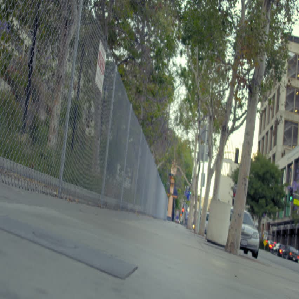

In [17]:
image_path = '/content/drive/MyDrive/captions/content/images/2075.jpg'
img = tf_image.load_img(image_path, target_size=(HEIGHT, WIDTH))
img.resize((HEIGHT, WIDTH))

In [18]:
remove_these = []
encoded_images = {}

for i in range(data.shape[0]):
  image_path = '/content/drive/MyDrive/captions/content/images/' + data['file_name'][i]
  print(image_path)
  try:
    img = tf_image.load_img(image_path, target_size=(HEIGHT, WIDTH))
    encoded_images[int(data['file_name'][i].split('.')[0])] = encodeImage(img)
  except:
    print('remove: ', i)
    remove_these.append(data['file_name'][i])

/content/drive/MyDrive/captions/content/images/1.jpg
1/1 [==============================] - 6s 6s/step
/content/drive/MyDrive/captions/content/images/3.jpg
1/1 [==============================] - 0s 45ms/step
/content/drive/MyDrive/captions/content/images/4.jpg
1/1 [==============================] - 0s 43ms/step
/content/drive/MyDrive/captions/content/images/5.jpg
1/1 [==============================] - 0s 25ms/step
/content/drive/MyDrive/captions/content/images/6.jpg
1/1 [==============================] - 0s 29ms/step
/content/drive/MyDrive/captions/content/images/7.jpg
1/1 [==============================] - 0s 25ms/step
/content/drive/MyDrive/captions/content/images/8.jpg
1/1 [==============================] - 0s 26ms/step
/content/drive/MyDrive/captions/content/images/9.jpg
1/1 [==============================] - 0s 24ms/step
/content/drive/MyDrive/captions/content/images/11.jpg
1/1 [==============================] - 0s 25ms/step
/content/drive/MyDrive/captions/content/images/12.jpg
1/

In [37]:
len(remove_these)
data = data[-data['file_name'].isin(remove_these)]
data.shape

(1790, 3)

In [38]:
data

,caption,url,file_name
0,startseq author : a life in photography -- in ...,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,startseq photograph of the sign being repaired...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,startseq the player staring intently at a comp...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,startseq globes : the green 3d person carrying...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,startseq the - bedroom stone cottage can sleep...,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg
...,...,...,...
1827,startseq person and groom embrace under the ve...,https://static1.squarespace.com/static/564125d...,2082.jpg
1828,startseq a bronze horse head sculpture against...,http://l7.alamy.com/zooms/39b15fd8b3af47bf9a7b...,2084.jpg
1829,startseq use a large mirror to make a small be...,https://cdn.homedit.com/wp-content/uploads/201...,2085.jpg
1830,startseq model and person attend awards endseq,https://media.gettyimages.com/photos/musician-...,2086.jpg


In [39]:
data.reset_index(drop=True, inplace=True)

In [40]:
data

,caption,url,file_name
0,startseq author : a life in photography -- in ...,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,startseq photograph of the sign being repaired...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,startseq the player staring intently at a comp...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,startseq globes : the green 3d person carrying...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,startseq the - bedroom stone cottage can sleep...,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg
...,...,...,...
1785,startseq person and groom embrace under the ve...,https://static1.squarespace.com/static/564125d...,2082.jpg
1786,startseq a bronze horse head sculpture against...,http://l7.alamy.com/zooms/39b15fd8b3af47bf9a7b...,2084.jpg
1787,startseq use a large mirror to make a small be...,https://cdn.homedit.com/wp-content/uploads/201...,2085.jpg
1788,startseq model and person attend awards endseq,https://media.gettyimages.com/photos/musician-...,2086.jpg


In [41]:
data['id'] = [int(data['file_name'][i].split('.')[0]) for i in range(data.shape[0])]

In [42]:
data.head()

,caption,url,file_name,id
0,startseq author : a life in photography -- in ...,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg,1
1,startseq photograph of the sign being repaired...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg,3
2,startseq the player staring intently at a comp...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg,4
3,startseq globes : the green 3d person carrying...,https://www.featurepics.com/StockImage/2009031...,5.jpg,5
4,startseq the - bedroom stone cottage can sleep...,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg,6


In [43]:
from string import punctuation
import re
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
data['caption'] = data['caption'].apply(lambda x: re.sub("["+punctuation+"]", ' ' ,x))
data['caption']

0       startseq author   a life in photography    in ...
1       startseq photograph of the sign being repaired...
2       startseq the player staring intently at a comp...
3       startseq globes   the green 3d person carrying...
4       startseq the   bedroom stone cottage can sleep...
                              ...                        
1785    startseq person and groom embrace under the ve...
1786    startseq a bronze horse head sculpture against...
1787    startseq use a large mirror to make a small be...
1788       startseq model and person attend awards endseq
1789    startseq abstract background laser light multi...
Name: caption, Length: 1790, dtype: object

In [46]:
data['caption'] = data['caption'].apply(lambda x: re.sub("\d", ' ', x))

In [48]:
data['caption'] = data['caption'].apply(lambda x: re.sub("\s+", ' ', x))
data['caption']

0       startseq author a life in photography in pictu...
1       startseq photograph of the sign being repaired...
2       startseq the player staring intently at a comp...
3       startseq globes the green d person carrying in...
4       startseq the bedroom stone cottage can sleep p...
                              ...                        
1785    startseq person and groom embrace under the ve...
1786    startseq a bronze horse head sculpture against...
1787    startseq use a large mirror to make a small be...
1788       startseq model and person attend awards endseq
1789    startseq abstract background laser light multi...
Name: caption, Length: 1790, dtype: object

In [49]:
data['caption'] = data['caption'].str.lower()
data['caption']

0       startseq author a life in photography in pictu...
1       startseq photograph of the sign being repaired...
2       startseq the player staring intently at a comp...
3       startseq globes the green d person carrying in...
4       startseq the bedroom stone cottage can sleep p...
                              ...                        
1785    startseq person and groom embrace under the ve...
1786    startseq a bronze horse head sculpture against...
1787    startseq use a large mirror to make a small be...
1788       startseq model and person attend awards endseq
1789    startseq abstract background laser light multi...
Name: caption, Length: 1790, dtype: object

In [51]:
word_count_threshold=5
word_counts={}
for caption in data['caption']:
  print(caption)
  for w in word_tokenize(caption):
    print('word: ', w)
    word_counts[w] = word_counts.get(w, 0) + 1
    print(word_counts)
  break


startseq author a life in photography in pictures endseq
word:  startseq
{'startseq': 1}
word:  author
{'startseq': 1, 'author': 1}
word:  a
{'startseq': 1, 'author': 1, 'a': 1}
word:  life
{'startseq': 1, 'author': 1, 'a': 1, 'life': 1}
word:  in
{'startseq': 1, 'author': 1, 'a': 1, 'life': 1, 'in': 1}
word:  photography
{'startseq': 1, 'author': 1, 'a': 1, 'life': 1, 'in': 1, 'photography': 1}
word:  in
{'startseq': 1, 'author': 1, 'a': 1, 'life': 1, 'in': 2, 'photography': 1}
word:  pictures
{'startseq': 1, 'author': 1, 'a': 1, 'life': 1, 'in': 2, 'photography': 1, 'pictures': 1}
word:  endseq
{'startseq': 1, 'author': 1, 'a': 1, 'life': 1, 'in': 2, 'photography': 1, 'pictures': 1, 'endseq': 1}


In [136]:
word_count_threshold=5
word_counts={}
for caption in data['caption']:
  for w in word_tokenize(caption):
    word_counts[w] = word_counts.get(w, 0) + 1
vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d ==>>> %d' %(len(word_counts), len(vocab)))

preprocessed words 3714 ==>>> 574


In [137]:
caption_lengths = []
for caption in data['caption']:
  words = word_tokenize(caption)
  words = [w for w in words if w in vocab]
  caption_lengths.append(len(words))
max_length = max(caption_lengths)
max_length

25

In [138]:
idxtoword={}
wordtoidx={}

ix=1
for w in vocab:
  wordtoidx[w] = ix
  idxtoword[ix] = w
  ix += 1

In [139]:
vocab_size = len(idxtoword) + 1
vocab_size

575

In [140]:
embeddings_index = {}
f = open('glove.42B.300d.txt', encoding="utf-8")

for line in f:
  line = line.strip()
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close()
print(f'Found {len(embeddings_index)} word vectors')

Found 1917494 word vectors


In [141]:
embedding_dim = 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoidx.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [142]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector, Activation, \
                                    Flatten, Reshape, concatenate, Dropout, BatchNormalization, add
from tqdm import tqdm

In [148]:
def data_generator(data, encoded_images, wordtoidx, max_length, num_photos_per_batch):
  x1, x2, y = [], [], []  # training data for photos, caption, predicted rest of the caption
  n=0
  for k, caption in enumerate(data['caption']):
    n += 1
    photo = encoded_images[data['id'][k]]
    seq = [wordtoidx[word] for word in word_tokenize(caption) if word in wordtoidx]
    for i in range(1, len(seq)):
      in_seq, out_seq = seq[:i], seq[i]
      in_seq = pad_sequences([in_seq], max_length)[0]
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
      x1.append(photo)
      x2.append(in_seq)
      y.append(out_seq)
    if n == num_photos_per_batch:
      yield [np.array(x1), np.array(x2)], np.array(y)
      x1,x2,y = [], [], []
      n = 0

if caption is:

"a girl playing in th rain with football"

4, 56, 34, 2, 8, 98, 9, 64

we want to predict the next word, i.e:

4 -> 56

4, 56 -> 34

4, 56, 34 -> 2

etc...

in_seq -> out_seq

yield example for generator function below...

In [72]:
def create_cubes(n):
  for x in range(n):
    return (x**3)	   # non-generator function

for x in create_cubes(10):
  print(x)

TypeError: 'int' object is not iterable

In [74]:
def create_cubes(n):
  for x in range(n):
    yield (x**3)	   # generator function

for x in create_cubes(10):
  print(x)

0
1
8
27
64
125
216
343
512
729


In [76]:
len(encoded_images.keys())

1790

In [78]:
data.shape

(1790, 4)

In [164]:
inputs1 = Input(shape=(OUTPUT_DIM,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

caption_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

caption_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 25)]                 0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 2048)]               0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 25, 300)              172500    ['input_13[0][0]']            
                                                                                                  
 dropout_11 (Dropout)        (None, 2048)                 0         ['input_12[0][0]']            
                                                                                            

In [165]:
caption_model.layers[2].set_weights([embedding_matrix])
caption_model.layers[2].trainable = False
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [146]:
num_photos_per_batch = 3
steps = len(data['caption'])//num_photos_per_batch


In [92]:
encoded_images[1].shape, encoded_images[23].shape

((2048,), (2048,))

In [166]:
for i in range(EPOCHS*2):
  generator = data_generator(data, encoded_images, wordtoidx, max_length, num_photos_per_batch)
  for batch in generator:
    print("Batch types:", [type(item) for item in batch])
    print("Shapes in first batch element:", [item.shape if hasattr(item, 'shape') else type(item) for item in batch[0]])  # Inspect the first element
    break
  caption_model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)


Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 4.8159

596/596 [==============================] - 74s 113ms/step - loss: 4.8159
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 4.3782

596/596 [==============================] - 67s 113ms/step - loss: 4.3782
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 4.1141

596/596 [==============================] - 68s 114ms/step - loss: 4.1141
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
594/596 [============================>.] - ETA: 0s - loss: 3.8741

596/596 [==============================] - 62s 104ms/step - loss: 3.8741
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 3.6631

596/596 [==============================] - 56s 94ms/step - loss: 3.6631
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 3.4543

596/596 [==============================] - 81s 136ms/step - loss: 3.4543
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 3.2691

596/596 [==============================] - 51s 85ms/step - loss: 3.2691
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 3.0821

596/596 [==============================] - 68s 114ms/step - loss: 3.0821
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 2.8970

596/596 [==============================] - 79s 133ms/step - loss: 2.8970
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 2.7099

596/596 [==============================] - 58s 97ms/step - loss: 2.7099
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 2.5513

596/596 [==============================] - 63s 106ms/step - loss: 2.5513
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 2.4044

596/596 [==============================] - 67s 113ms/step - loss: 2.4044
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 2.2748

596/596 [==============================] - 63s 105ms/step - loss: 2.2748
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 2.1416

596/596 [==============================] - 64s 107ms/step - loss: 2.1416
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 2.0406

596/596 [==============================] - 75s 125ms/step - loss: 2.0406
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 1.9364

596/596 [==============================] - 58s 97ms/step - loss: 1.9364
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 1.8487

596/596 [==============================] - 65s 109ms/step - loss: 1.8487
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 1.7713

596/596 [==============================] - 71s 120ms/step - loss: 1.7713
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 1.7045

596/596 [==============================] - 68s 115ms/step - loss: 1.7045
Batch types: [<class 'list'>, <class 'numpy.ndarray'>]
Shapes in first batch element: [(18, 2048), (18, 25)]
595/596 [============================>.] - ETA: 0s - loss: 1.6196

596/596 [==============================] - 68s 114ms/step - loss: 1.6196


In [108]:
steps = len(data['caption']) // num_photos_per_batch
steps

596

In [149]:
caption_model.save_weights('caption_model.hdf5')

In [150]:
!cp caption_model.hdf5 /content/drive/MyDrive/

In [173]:
def generateCaption(photo):
  in_text = START
  for i in range(max_length):
    sequence = [wordtoidx[word] for word in word_tokenize(in_text) if word in wordtoidx]
    sequence = pad_sequences([sequence], maxlen=max_length)
    yhat = caption_model.predict([photo, sequence], verbose=0)
    yhat = np.argmax(yhat)
    word = idxtoword[yhat]
    in_text += ' ' + word
    if word == STOP:
      break
  final = in_text.split()
  final = final[1:-1]
  final = ' '.join(final)
  return final


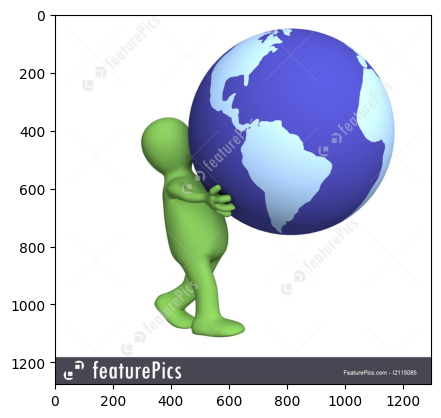

Caption:  a group of people eating on a boat


In [175]:
index = 3
image_file=data.iloc[index, 2]

image = encoded_images[int(image_file.split('.')[0])]

image = image.reshape(1, OUTPUT_DIM)
x = plt.imread('/content/drive/MyDrive/captions/content/images/' + image_file)
plt.imshow(x)
plt.show()

print("Caption: ", generateCaption(image))